In [56]:
import sys
sys.path.append('../')
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [15]:
from models.marianmt import get_marianmt_tokenizer

tokenizer = get_marianmt_tokenizer()
root_data = '../data'
src = [s.rstrip() for s in open(f"{root_data}/corpus.en_ru.1m.ru", "r").readlines()]
tgt = [t.rstrip() for t in open(f"{root_data}/corpus.en_ru.1m.en", "r").readlines()]

In [42]:
print(f'Total size of the dataset is {len(src)}')

Total size of the dataset is 1000000


Thats how translation Ru-Eng pair looks like

In [48]:
from pprint import pprint
pprint(list(zip(src[:5], tgt[:5])))

[('Такое развитие характера Гарри может разочаровать читателей, полюбивших его '
  'былую мстительность, но с другой стороны это преображение укрепляет позицию '
  'тех, кто не видит глубже сюжета и изображения героев.',
  "This new development in Harry's character may be a disappointment to those "
  'readers who enjoyed his old vindictive ways, but it also reinforces the '
  'position of pro-Potter people who do not see beneath the surface appearance '
  'of the characters and plots.'),
 ('Решение суда (группа вернулась под крыло к Elektra Entertainment) '
  'предотвратило дальнейшие нападки со стороны неугомонного Ульриха и не '
  'позволило ему обнародовать детали нового контракта.',
  'A nondisclosure clause in the final settlement (the band is back on '
  'Elektra) prevents Ulrich, an irrepressible motormouth, from providing any '
  'juicy contractual details.'),
 ('Когда тебе 18 или 19 лет, легко перенимать бандитские повадки и переносить '
  'их в группу.',
  "When you're 18 or

This is how the sentence looks like after the tokenizer (marianmt tokenizer in this example)

In [44]:
print(' '.join(tokenizer.tokenize(src[0])), '\n', ' '.join(tokenizer.tokenize(tgt[0])))

▁Такое ▁развитие ▁характера ▁Гар ри ▁может ▁раз о ча ровать ▁читателей , ▁по люб ивших ▁его ▁был ую ▁м сти тельность , ▁но ▁с ▁другой ▁стороны ▁это ▁пре об ражение ▁укрепляет ▁позицию ▁тех , ▁кто ▁не ▁видит ▁глубже ▁с ю жет а ▁и ▁изображения ▁г еро ев . 
 ▁T h is ▁ new ▁de v el op ment ▁in ▁H ar ry ' s ▁c har act er ▁m ay ▁b e ▁a ▁d is ap po int ment ▁to ▁t ho se ▁re ad ers ▁w ho ▁ en j o y ed ▁h is ▁ ol d ▁vi nd ic t ive ▁w ay s , ▁b ut ▁ it ▁al s o ▁re in for c es ▁the ▁ pos i tion ▁of ▁pro - P ot ter ▁ pe op le ▁w ho ▁ do ▁ not ▁ se e ▁b en e a th ▁the ▁s ur f ac e ▁a pp ear ance ▁of ▁the ▁c har act ers ▁and ▁p lo ts .


In [45]:
print(f'Number of tokens Ru: {len(tokenizer.tokenize(src[0]))}. Number of chars Ru: {len(src[0])}')

Number of tokens Ru: 48. Number of chars Ru: 205


In [49]:
print(f'Number of tokens Eng: {len(tokenizer.tokenize(tgt[0]))}. Number of chars Eng: {len(tgt[0])}')

Number of tokens Eng: 122. Number of chars Eng: 251


In [58]:
token_lengths_src = []
char_lengths_src = []
word_lengths_src = [] # tokens with ▁

In [59]:
for s in tqdm(src):
    char_lengths_src.append(len(s))
    
    tokenized = tokenizer.tokenize(s)
    token_lengths_src.append(len(tokenized))
    word_lengths_src.append(len([t for t in tokenized if '▁' in t]))

In [60]:
token_lengths_tgt = []
char_lengths_tgt = []
word_lengths_tgt = [] # tokens with ▁

In [61]:
for s in tqdm(tgt):
    char_lengths_tgt.append(len(s))
    
    tokenized = tokenizer.tokenize(s)
    token_lengths_tgt.append(len(tokenized))
    word_lengths_tgt.append(len([t for t in tokenized if '▁' in t]))

# Length analysis

Let's analyze the lengths of our training data

* **Token length** is the amount of tokens in the tokenized sentence
* **Char length** is the amount of characters in the original sentence
* **Word length** is the amount of words in the tokenized sentence (e.g. the amount '▁' symbols in the sentence for our tokenizer)

In [64]:
import seaborn as sns

### SRC token length

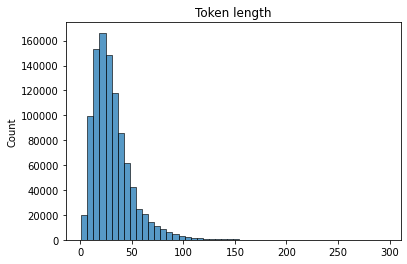

In [88]:
plt.title('Token length')
sns.histplot(token_lengths_src, bins=50)
plt.show()

### TGT token length

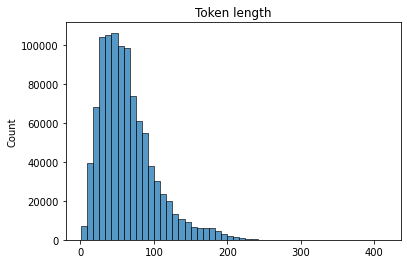

In [85]:
plt.title('Token length')
sns.histplot(token_lengths_tgt, bins=50)
plt.show()

As we can see, the total amount of tokens is bigger in english sentence, then in the russian. Maybe the tokenizer splitting is more optimized for the Russian language

### SRC char length

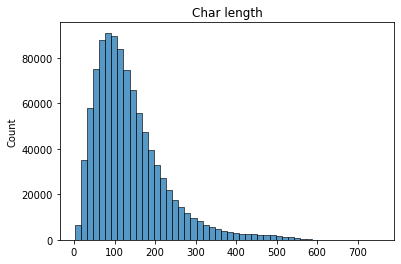

In [87]:
plt.title('Char length')
sns.histplot(char_lengths_src, bins=50)
plt.show()

### TGT char length

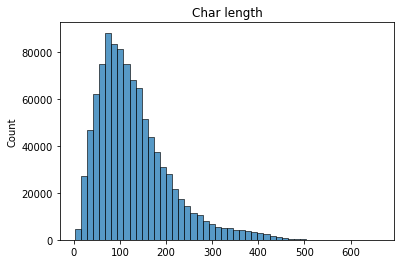

In [84]:
plt.title('Char length')
sns.histplot(char_lengths_tgt, bins=50)
plt.show()

Our previous claim is confirmed by the amount of characters, as they are very similar, but the amount of tokens is bigger 2x times

### SRC word length

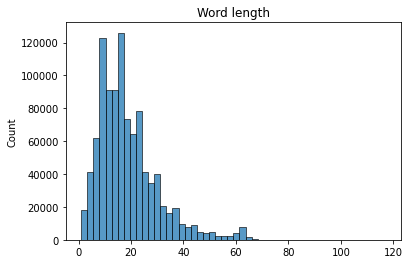

In [86]:
plt.title('Word length')
sns.histplot(word_lengths_src, bins=50)
plt.show()

### TGT word length

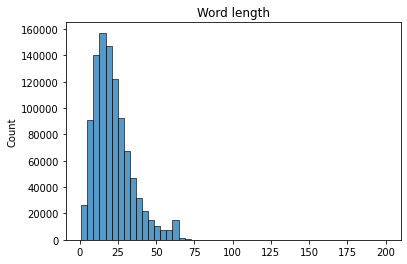

In [83]:
plt.title('Word length')
sns.histplot(word_lengths_tgt, bins=50)
plt.show()

The distribution of amount of words is also similar between RU and ENG